In [1]:
# logging data
import pandas as pd
import numpy as np
import statsmodels.formula as smf

url = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'

original_data = pd.read_csv(url)
original_data

/tmp/ipykernel_366/1313864890.py:8: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv(url)


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,...,PSYCH_body_self_image_questionnaire_height_dissatisfaction_score,PSYCH_body_self_image_questionnaire_fatness_evaluation_score,PSYCH_body_self_image_questionnaire_negative_affect_score,PSYCH_body_self_image_questionnaire_social_dependence_score,PSYCH_big_five_inventory_agreeable_score,PSYCH_big_five_inventory_conscientious_score,PSYCH_big_five_inventory_extraverted_score,PSYCH_big_five_inventory_neurotic_score,PSYCH_big_five_inventory_open_score,REMOVE_case
0,cscs_00001,1,Yes,Yes,British Columbia,71.0,Non-binary,NaN,NaN,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,cscs_00002,1,Yes,Yes,Ontario,69.0,Woman,NaN,NaN,Not Selected,...,3.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,No
2,cscs_00003,1,Yes,Yes,Quebec,56.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,cscs_00005,1,Yes,Yes,NaN,54.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,28.0,34.0,30.0,32.0,37.0,No
4,cscs_00006,1,Yes,Yes,Ontario,30.0,Man,Not Selected,"Indigenous peoples (e.g., First Nations, Métis...","Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,cscs_11809,1,Yes,Yes,NaN,45.0,Woman,NaN,NaN,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,31.0,33.0,33.0,13.0,39.0,No
11427,cscs_11810,1,Yes,Yes,British Columbia,36.0,Man,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,32.0,37.0,31.0,NaN,38.0,No
11428,cscs_11812,3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
11429,cscs_11812,3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [2]:
url_name = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/var_names.csv"

name_data = pd.read_csv(url_name)
name_data

,row,dataset,old_var,new_var,text
0,1,2021_cross,StartDate,SURVEY_start_date,Start Date
1,2,2021_cross,EndDate,SURVEY_end_date,End Date
2,3,2021_cross,Status,SURVEY_response_type,Response Type
3,4,2021_cross,IPAddress,SURVEY_ip_address,IP Address
4,5,2021_cross,Progress,SURVEY_progress,Progress
...,...,...,...,...,...
2380,2381,2023_cross,Q4,WORK_hours_per_week,"On average, how many hours per week do you work?"
2381,2382,2023_cross,Q80,GEO_rural_urban,What best describes the community you live in?
2382,2383,2023_cross,Q117,SURVEY_prize_draw,Would you like to enter the drawing for a $200...
2383,2384,2023_cross,Q118,SURVEY_email_address,What is your email address?


In [3]:
covid_data = original_data.loc[:,"COVID_prevention_distancing":"COVID_vaccinated_two_weeks_since_last_dose"]
covid_related_loneliness = original_data.loc[:,"LONELY_change_pre_covid"]
connection_data = original_data.loc[:,"CONNECTION_social_barriers_afraid":"CONNECTION_social_barriers_other_text"]

In [4]:
covid_data

,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,COVID_vaccinated_two_weeks_since_last_dose
0,Somewhat closely,Somewhat closely,Somewhat closely,Not at all,Not at all,Not at all,"Yes, three or more doses",NaN
1,Very closely,Not at all,Very closely,Very closely,Very closely,Very closely,"Yes, three or more doses",NaN
2,Somewhat closely,Not at all,Somewhat closely,Not at all,Not at all,Somewhat closely,"Yes, three or more doses",NaN
3,Not at all,Not at all,Somewhat closely,Not at all,Not at all,Not at all,"Yes, three or more doses",NaN
4,Very closely,Very closely,Very closely,Very closely,Very closely,Somewhat closely,"Yes, one dose","Yes, it was more than two weeks ago."
...,...,...,...,...,...,...,...,...
11426,Somewhat closely,Not at all,Somewhat closely,Somewhat closely,Very closely,Not at all,"Yes, three or more doses",NaN
11427,Not at all,Not at all,Very closely,Not at all,Not at all,Not at all,"Yes, three or more doses",NaN
11428,Somewhat closely,Somewhat closely,Very closely,Somewhat closely,Somewhat closely,Somewhat closely,"Yes, two doses",NaN
11429,Not at all,Not at all,Very closely,Somewhat closely,Not at all,Not at all,"Yes, two doses",NaN


In [5]:
covid_related_loneliness

0                         NaN
1                         NaN
2                         NaN
3                         NaN
4        Somewhat more lonely
                 ...         
11426                     NaN
11427                     NaN
11428    Somewhat more lonely
11429          About the same
11430    Somewhat more lonely
Name: LONELY_change_pre_covid, Length: 11431, dtype: object

In [6]:
connection_data

,CONNECTION_social_barriers_afraid,CONNECTION_social_barriers_no_invitations,CONNECTION_social_barriers_too_busy,CONNECTION_social_barriers_too_tired_a,CONNECTION_social_barriers_too_stressed,CONNECTION_social_barriers_shy,CONNECTION_social_barriers_nervous,CONNECTION_social_barriers_work_too_much,CONNECTION_social_barriers_family_responsibilities,CONNECTION_social_barriers_nothing_to_do,CONNECTION_social_barriers_no_people,CONNECTION_social_barriers_people_too_busy,CONNECTION_social_barriers_what_to_do,CONNECTION_social_barriers_small_living_space,CONNECTION_social_barriers_no_visitors,CONNECTION_social_barriers_covid,CONNECTION_social_barriers_alienated,CONNECTION_social_barriers_other_text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11428,Not Selected,Nobody invites me to do things,Not Selected,I am too tired,I am too stressed,Not Selected,Not Selected,Not Selected,I have family responsibilities,Not Selected,I don't have people to hang out with,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Presented but no response
11429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# how does covid impact mental health

mental health: loneliness & wellness

loneliness: LONELY_change_pre_covid

wellness: WELLNESS_life_satisfaction

predictors:COVID_prevention_distancing, COVID_prevention_masks, COVID_prevention_hand_washing, COVID_prevention_reduce_people, COVID_prevention_avoid_trips, COVID_prevention_household, COVID_vaccinated


In [7]:
lonely_data_copy = original_data["LONELY_change_pre_covid"].dropna()
lonely_data_copy.replace(["About the same", "Somewhat more lonely", "Somewhat less lonely", "Much more lonely", "Much less lonely"],\
                           [0, -1, 1, -2, 2],\
                           inplace=True)
lonely_data_copy.drop(lonely_data_copy[lonely_data_copy == "Presented but no response"].index, inplace=True)
lonely_data_copy.mean()

-0.6019235907026449

In [8]:
wellness_data_copy = original_data["WELLNESS_life_satisfaction"].dropna()

wellness_data_copy.mean()

6.18220647984165

### 1. Does people feel more lonely after the COVID-19 pandemic
the pandemic has majorly impact people's lives since 2020. However, after the pandemic is over, which is roughly since 2023, does people still feel lonelier?

time of dataset: 2023

outcoome: average quantified loneliness number

variable: LONELY_change_pre_covid

method: bootstrapped confidence interval

In [9]:
"""
quantifiy the loneliness that people reflected where
About the same = 0
Somewhat more lonely = 1
Somewhat less lonely = -1
Much more lonely = -2
Much less lonely = 2
trying to find the average loneliness score using bootstrapped confidence intervals
denote negative values as more lonely, positive values as less lonely
"""

original_data_2023_loneliness = original_data.loc[original_data["SURVEY_start_date"] >= "2023-01-01"]["LONELY_change_pre_covid"]
#original_data_2023_loneliness = original_data["LONELY_change_pre_covid"]
"""
drop na since I can't set the defult to be 'about the same'
people might not prefer to respond as they're so lonely
na entries too much if replace might affect the response (about 9/10 of the data are na)
"""
original_data_2023 = original_data_2023_loneliness.dropna()

original_data_2023.replace(["About the same", "Somewhat more lonely", "Somewhat less lonely", "Much more lonely", "Much less lonely"],\
                           [0, -1, 1, -2, 2],\
                           inplace=True)
#original_data_2023.drop(original_data_2023[original_data_2023 == "Presented but no response"].index, inplace=True)

original_data_2023.value_counts()

LONELY_change_pre_covid
 0    157
-1     74
 1     55
-2     39
 2     28
Name: count, dtype: int64

In [10]:
# bootstrapped 95% confidence interval
import numpy as np
import plotly.express as px
# Number of bootstrap samples
n_bootstraps = 1000

# Store bootstrap statistics
bootstrap_means = []

# Generate bootstrap samples
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(original_data_2023, size=len(original_data_2023_loneliness), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")


95% Confidence Interval: [-0.1494611127293912, -0.0801048645499563]


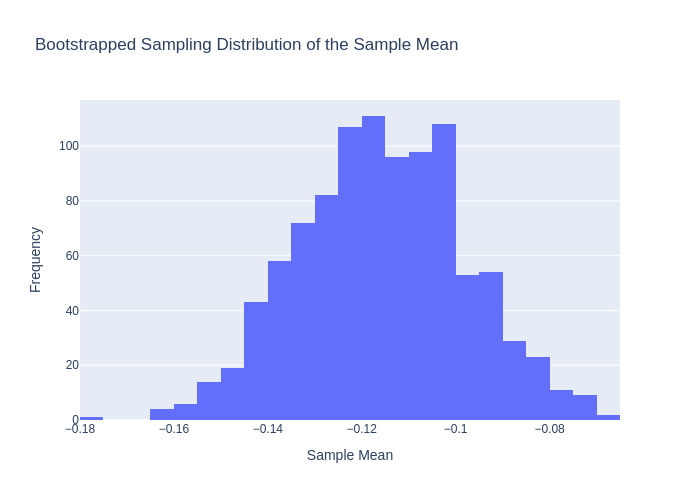

In [11]:
# plot the bootstrapped sampling distribution of the sample mean
fig = px.histogram(
    bootstrap_means, 
    nbins=30, 
    title="Bootstrapped Sampling Distribution of the Sample Mean",
    labels={'value': 'Sample Mean'},
    template='plotly'
)

# Add customization
fig.update_layout(
    xaxis_title="Sample Mean",
    yaxis_title="Frequency",
    showlegend=False
)

# Show the plot
fig.show(renderer="png")

As 0 is not contained in the confidence interval, I am 95% confidenct that the population average of "LONELY_change_pre_covid" is less than 0

In other words, COVID-19 did make people feel more lonely

However, the confidence interval is roughly `[-0.15, -0.08]`, which is close to 0, so the impact of COVID-19 is small

### 2. Do the COVID-preventing practices make people feel lonelier
a change in lifestype during the pandemic is the use of COVID-preventing practices. Do these practices have an effect on making people feel lonelier?

time: 2021-2023

outcome: a linear regression model measuring "LONELY_change_pre_covid"

predictors: COVID_X

method: simple linear regression

In [12]:
covid_data.drop("COVID_vaccinated_two_weeks_since_last_dose", axis=1, inplace=True)
covid_data["LONELY_change_pre_covid"] = original_data["LONELY_change_pre_covid"]
covid_data.dropna(inplace=True)
covid_data

,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,LONELY_change_pre_covid
4,Very closely,Very closely,Very closely,Very closely,Very closely,Somewhat closely,"Yes, one dose",Somewhat more lonely
8,Very closely,Very closely,Very closely,Very closely,Very closely,Very closely,"Yes, one dose",Somewhat less lonely
10,Somewhat closely,Not at all,Somewhat closely,Not at all,Not at all,Somewhat closely,No,About the same
13,Very closely,Very closely,Very closely,Very closely,Very closely,Very closely,"Yes, two doses",About the same
18,Very closely,Very closely,Very closely,Very closely,Very closely,Very closely,No,About the same
...,...,...,...,...,...,...,...,...
11412,Somewhat closely,Very closely,Somewhat closely,Somewhat closely,Somewhat closely,Not at all,"Yes, three or more doses",Somewhat more lonely
11413,Somewhat closely,Not at all,Somewhat closely,Somewhat closely,Somewhat closely,Not at all,"Yes, five or more doses",Somewhat more lonely
11428,Somewhat closely,Somewhat closely,Very closely,Somewhat closely,Somewhat closely,Somewhat closely,"Yes, two doses",Somewhat more lonely
11429,Not at all,Not at all,Very closely,Somewhat closely,Not at all,Not at all,"Yes, two doses",About the same


In [13]:
"""
dropping "prevention but no response" as we can't tell from the data the extent of how those people conduct covid prevention practices
dropna in "LONELY_change_pre_covid", same reason as in previous task
"""

covid_data.drop(covid_data[covid_data["COVID_prevention_distancing"] == "Presented but no response"].index, axis=0, inplace=True)
covid_data.drop(covid_data[covid_data["COVID_prevention_masks"] == "Presented but no response"].index, axis=0, inplace=True)
covid_data.drop(covid_data[covid_data["COVID_prevention_hand_washing"] == "Presented but no response"].index, axis=0, inplace=True)
covid_data.drop(covid_data[covid_data["COVID_prevention_reduce_people"] == "Presented but no response"].index, axis=0, inplace=True)
covid_data.drop(covid_data[covid_data["COVID_prevention_avoid_trips"] == "Presented but no response"].index, axis=0, inplace=True)
covid_data.drop(covid_data[covid_data["COVID_prevention_household"] == "Presented but no response"].index, axis=0, inplace=True)
covid_data.drop(covid_data[covid_data["COVID_vaccinated"] == "Presented but no response"].index, axis=0, inplace=True)
covid_data.drop(covid_data[covid_data["LONELY_change_pre_covid"] == "Presented but no response"].index, axis=0, inplace=True)

covid_data

,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,LONELY_change_pre_covid
4,Very closely,Very closely,Very closely,Very closely,Very closely,Somewhat closely,"Yes, one dose",Somewhat more lonely
8,Very closely,Very closely,Very closely,Very closely,Very closely,Very closely,"Yes, one dose",Somewhat less lonely
10,Somewhat closely,Not at all,Somewhat closely,Not at all,Not at all,Somewhat closely,No,About the same
13,Very closely,Very closely,Very closely,Very closely,Very closely,Very closely,"Yes, two doses",About the same
18,Very closely,Very closely,Very closely,Very closely,Very closely,Very closely,No,About the same
...,...,...,...,...,...,...,...,...
11412,Somewhat closely,Very closely,Somewhat closely,Somewhat closely,Somewhat closely,Not at all,"Yes, three or more doses",Somewhat more lonely
11413,Somewhat closely,Not at all,Somewhat closely,Somewhat closely,Somewhat closely,Not at all,"Yes, five or more doses",Somewhat more lonely
11428,Somewhat closely,Somewhat closely,Very closely,Somewhat closely,Somewhat closely,Somewhat closely,"Yes, two doses",Somewhat more lonely
11429,Not at all,Not at all,Very closely,Somewhat closely,Not at all,Not at all,"Yes, two doses",About the same


In [14]:
covid_data["COVID_prevention_distancing"].value_counts()

COVID_prevention_distancing
Very closely        1862
Somewhat closely    1379
Not at all           397
Name: count, dtype: int64

In [15]:
covid_data.replace(["Very closely", "Somewhat closely", "Not at all"],\
                  [2, 1, 0], inplace=True)
covid_data.replace(["About the same", "Somewhat more lonely", "Somewhat less lonely", "Much more lonely", "Much less lonely"],\
                           [0, -1, 1, -2, 2],\
                           inplace=True)
covid_data

,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,LONELY_change_pre_covid
4,2,2,2,2,2,1,"Yes, one dose",-1
8,2,2,2,2,2,2,"Yes, one dose",1
10,1,0,1,0,0,1,No,0
13,2,2,2,2,2,2,"Yes, two doses",0
18,2,2,2,2,2,2,No,0
...,...,...,...,...,...,...,...,...
11412,1,2,1,1,1,0,"Yes, three or more doses",-1
11413,1,0,1,1,1,0,"Yes, five or more doses",-1
11428,1,1,2,1,1,1,"Yes, two doses",-1
11429,0,0,2,1,0,0,"Yes, two doses",0


In [16]:
covid_data["mean_practice"] = covid_data.loc[:,"COVID_prevention_distancing":"COVID_prevention_household"].mean(axis=1)
covid_data

,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,LONELY_change_pre_covid,mean_practice
4,2,2,2,2,2,1,"Yes, one dose",-1,1.833333
8,2,2,2,2,2,2,"Yes, one dose",1,2.000000
10,1,0,1,0,0,1,No,0,0.500000
13,2,2,2,2,2,2,"Yes, two doses",0,2.000000
18,2,2,2,2,2,2,No,0,2.000000
...,...,...,...,...,...,...,...,...,...
11412,1,2,1,1,1,0,"Yes, three or more doses",-1,1.000000
11413,1,0,1,1,1,0,"Yes, five or more doses",-1,0.666667
11428,1,1,2,1,1,1,"Yes, two doses",-1,1.166667
11429,0,0,2,1,0,0,"Yes, two doses",0,0.500000


In [17]:
# simple linear regression
import pandas as pd
import statsmodels.formula.api as smf

model = smf.ols(formula='LONELY_change_pre_covid ~ mean_practice', data=covid_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     LONELY_change_pre_covid   R-squared:                       0.019
Model:                                 OLS   Adj. R-squared:                  0.019
Method:                      Least Squares   F-statistic:                     71.33
Date:                     Sat, 23 Nov 2024   Prob (F-statistic):           4.31e-17
Time:                             18:44:40   Log-Likelihood:                -5243.5
No. Observations:                     3638   AIC:                         1.049e+04
Df Residuals:                         3636   BIC:                         1.050e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2071      0.050     -4.181      0.000      -0.304      -0.110
mean_practice    -0.2691      0.032     -8.446      0.000      -0.332      -0.207
==============================================================================
Omnibus:                      158.177   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.883
Skew:                           0.543   Prob(JB):                     1.43e-39
Kurtosis:                       3.022   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As seen in the summary, since the p-value is 0, we have very strong evidence that there is a negative relation between the covid prevention practices and people's loneliness. In other words, the more people conduct the practices, the more lonely people would feel.

### 3. Do people feel more satisfied to their life in 2023 than in 2021?
From the previous questions, we know that covid makes people feel more lonely. What about their lives? Are people more satisfied with their lives after the pandemic? we try to answer the question by finding whether people are more satisfied to their life in 2023 compared to 2021.

time: 2023 and 2021

outcome: confidence interval of a difference based on "WELLNESS_life_satisfaction"

variable: "WELLNESS_life_satisfaction"

method: double bootstrapped confidence interval

In [18]:
wellness_data_2021 = original_data.loc[original_data["SURVEY_start_date"] <= "2021-12-31"]["WELLNESS_life_satisfaction"].dropna()
wellness_data_2023 = original_data.loc[original_data["SURVEY_start_date"] >= "2023-01-01"]["WELLNESS_life_satisfaction"].dropna()
print(wellness_data_2021.size)
print(wellness_data_2023.size)

3231
2493


In [19]:
"""
conducting a double bootstrapping
since we can't guaruantee that the people who took the servey in 2021 and 2023 are the same, we take the difference of the 
average wellness score
"""
n_bootstraps = 1000
bootstrapped_mean_differences = []

for i in range(n_bootstraps):
    bootstrap_sample1 = np.random.choice(wellness_data_2021, size=len(wellness_data_2021), replace=True)
    bootstrap_sample2 = np.random.choice(wellness_data_2023, size=len(wellness_data_2023), replace=True)
    bootstrapped_mean_differences.append(bootstrap_sample2.mean() - bootstrap_sample1.mean())

print("90% confidence interval:")
np.quantile(bootstrapped_mean_differences, [0.05,0.95])

90% confidence interval:


array([0.04303157, 0.25288256])

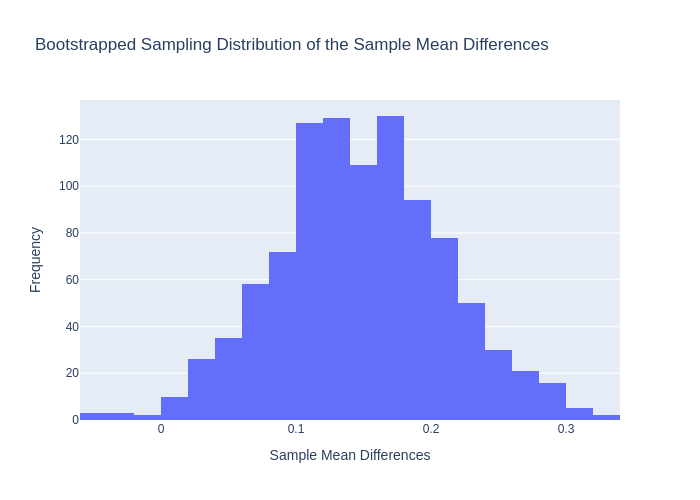

In [20]:
# plot the bootstrapped sampling distribution of the sample mean
fig = px.histogram(
    bootstrapped_mean_differences, 
    nbins=30, 
    title="Bootstrapped Sampling Distribution of the Sample Mean Differences",
    labels={'value': 'Sample Mean Differences'},
    template='plotly'
)

# Add customization
fig.update_layout(
    xaxis_title="Sample Mean Differences",
    yaxis_title="Frequency",
    showlegend=False
)

# Show the plot
fig.show(renderer="png")

As shown, the 90% double bootstrapped confidence interval is roughly `[0.046, 0.252]`. The difference of the satisfaction score is positive, and 0 is not included in the confidence interval, so people's lives are slightly better in 2023 than in 2021. 

However, the nnumber of data points we get in 2023 is 2493, which is less than 3231, the number of data points in 2021. Such difference may result in a wrong conclusion for this test. A further research is needed.

# Conclusion

In this part, we measure the impact of COVID-19 on people's lives. We found that after the pandemic, people feel more lonely, and that the COVID prevention practices have something to do with this phenomenon. Lastly, we found that there is a slight increase on people's life satisfaction, although more reasearch is needed.

Overall, COVID negatively impact on people's mental health, where people felt more lonely. After the pandemic, people are feeling better and more satisfied to their lives. However, both the impact of COVID and the improvement on people's mental health is small. We need more effort to make people's lives become better.